#### PRESENTACIÓN DEL PROYECTO - PROYECTO: RESERVAS - HOTELES

El dataset elegido contiene registros de reservas realizadas en un hotel a lo largo del tiempo, incluyendo variables clave para analizar el comportamiento del cliente, la demanda, y las cancelaciones. Incluye más de 80.000 registros y variables como:
 - room_type_reserved: tipo de habitación reservada
 - market_segment_type: canal por el dual se realiza la reserva (online, offline, corporative, etc.)
 - lead_time: número de días de anticipación con los que se hizo la reserva
 - avg_price_per_room: precio promedio por habitación
 - booking status: si la reserva fue cancelada o no

El objetivo de este proyecto es desarrollar un modelo predictivo que anticipe si una reserva será cancelada o no, utilizando un dataset con información sobre las reservas de un hotel. Al identificar las reservas propensas a ser canceladas, los hoteles podrán gestionar mejor su inventario, ajustar precios y tomar decisiones más informadas para reducir pérdidas por cancelaciones. Este enfoque permitirá optimizar la planificación y mejorar la rentabilidad a través de una gestión eficiente de las reservas.



HIPÓTESIS:

- Las reservas hechas con mayor anticipación tienen más probabilidad de cancelarse.
- Los clientes con más solicitudes especiales tienden a cancelar menos.
- Las cancelaciones aumentan en meses específicos del año.
- Ciertos tipos de habitación tienen una duración de estadía mayor que otros.
- Los grupos familiares hacen estadías más largas que los viajeros solos.

#### ANÁLISIS EXPLORATORIO - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1_-XWC-AXuxhS8AjBC8CXK-I7NXA44ZnS')

In [3]:
df_copia = df.copy()

In [4]:
df_copia.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# Porcentaje de reservas canceladas vs. no canceladas
df['booking_status'].value_counts(normalize=True) * 100

,proportion
booking_status,
Not_Canceled,67.236389
Canceled,32.763611


In [8]:
df_copia.select_dtypes(include='object').nunique()

,0
Booking_ID,36275
type_of_meal_plan,4
room_type_reserved,7
market_segment_type,5
booking_status,2


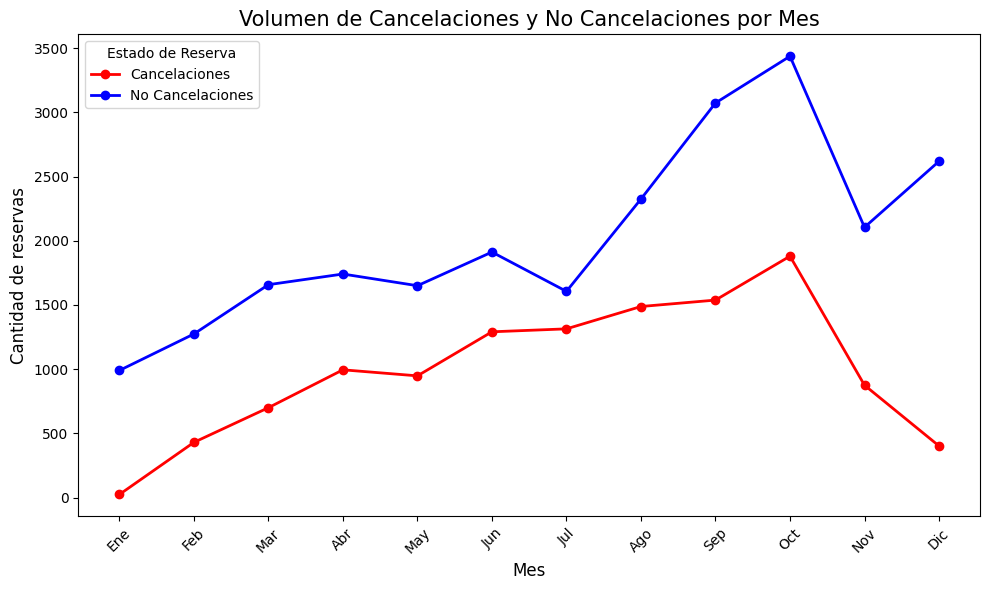

In [9]:
# Filtro las filas con cancelaciones para realizar el conteo del mismo
cancelaciones_por_mes = df[df['booking_status'] == 'Canceled'] \
    .groupby('arrival_month') \
    .size() \
    .sort_index()

# Filtro las filas con no cancelaciones para realizar el conteo
no_cancelaciones_por_mes = df[df['booking_status'] == 'Not_Canceled'] \
    .groupby('arrival_month') \
    .size() \
    .sort_index()

# Creación del gráfico de líneas para ver la variación de ambas variables y su relación
plt.figure(figsize = (10, 6))
plt.plot(cancelaciones_por_mes.index, cancelaciones_por_mes.values, marker='o', color='Red', label='Cancelaciones', linestyle='-', linewidth=2)
plt.plot(no_cancelaciones_por_mes.index, no_cancelaciones_por_mes.values, marker='o', color='Blue', label='No Cancelaciones', linestyle='-', linewidth=2)
plt.title('Volumen de Cancelaciones y No Cancelaciones por Mes',fontsize = 15)
plt.xlabel('Mes', fontsize = 12)
plt.ylabel('Cantidad de reservas', fontsize = 12)
plt.xticks(
    ticks=range(1, 13),
    labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
            'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'],
    rotation=45
)

plt.legend(title='Estado de Reserva')
plt.tight_layout()
plt.show()



En el gráfico se observa que en los primeros meses (enero a abril), las cancelaciones son relativamente bajas, pero comienzan a aumentar notablemente a partir de mayo, alcanzando su punto máximo en octubre.

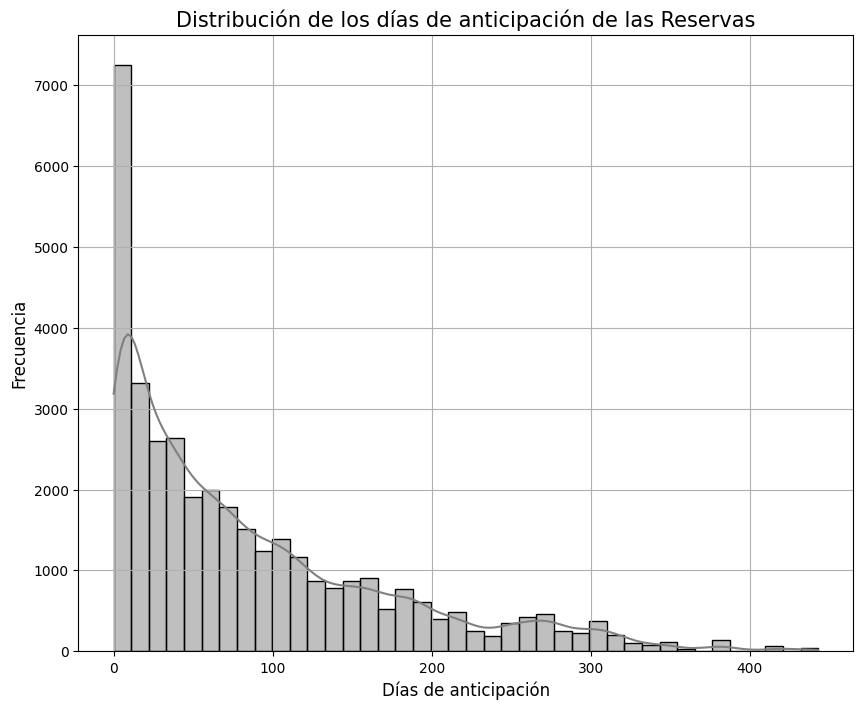

In [10]:
plt.figure(figsize = (10,8))
sns.histplot(df_copia["lead_time"], bins = 40, kde = True, color = "grey")
plt.title("Distribución de los días de anticipación de las Reservas", fontsize = 15)
plt.xlabel("Días de anticipación", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.grid(True)
plt.show()

El histograma que analiza el Lead Time (días de anticipación de la reserva) muestra una concentración de las barras en la parte izquierda del gráfico, es decir, que muchos clientes hacen sus reservas con poca o nula anticipación.

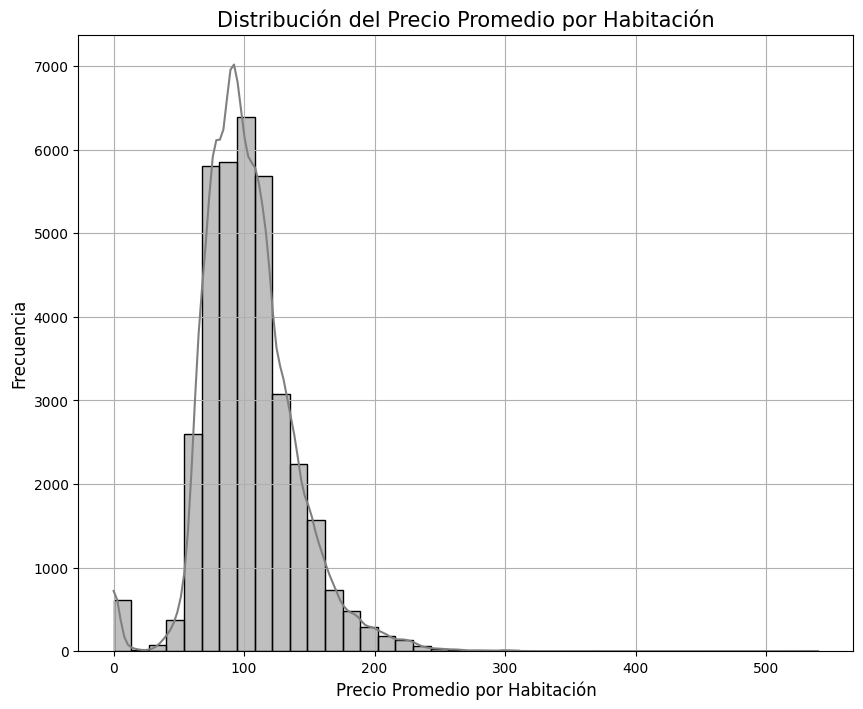

In [11]:
plt.figure(figsize = (10,8))
sns.histplot(df_copia["avg_price_per_room"], bins = 40, kde = True, color = "grey")
plt.title("Distribución del Precio Promedio por Habitación", fontsize = 15)
plt.xlabel("Precio Promedio por Habitación", fontsize = 12)
plt.ylabel("Frecuencia", fontsize = 12)
plt.grid(True)
plt.show()

En el diagrama se observa que la mayoría de los precios promedio están concentrados entre los 50 y 150 dolares. Hay una larga cola hacia la derecha, lo que indica que hay reservas con precios significativamente más altos, aunque son menos frecuentes. La curva muestra una densidad continua que ayuda a visualizar la forma general de la distribución. Muestra una mayor densidad en los precios bajos-medios y una caída pronunciada después de ciertos valores.

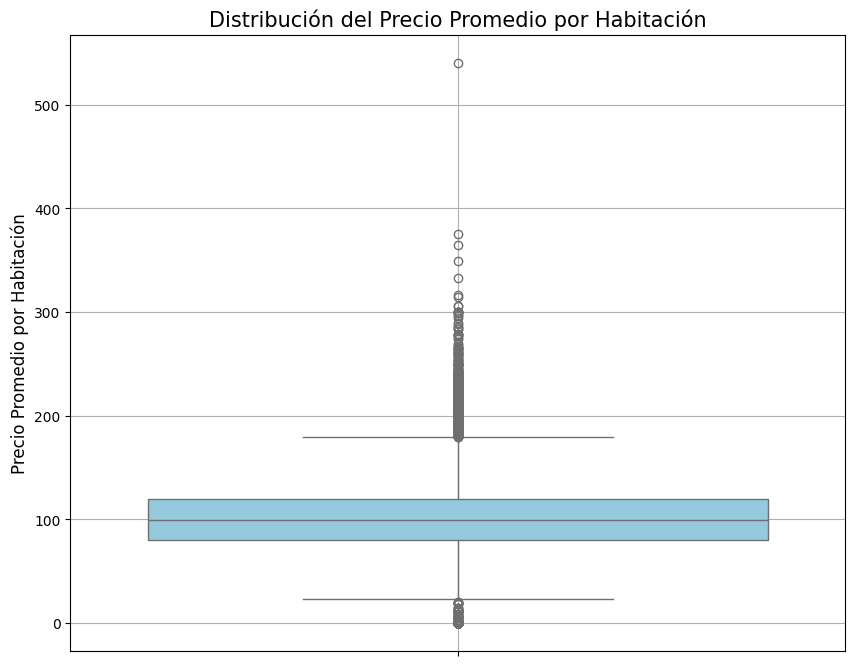

In [12]:
plt.figure(figsize = (10,8))
sns.boxplot(df_copia["avg_price_per_room"], color = "skyblue")
plt.title("Distribución del Precio Promedio por Habitación", fontsize = 15)
plt.ylabel("Precio Promedio por Habitación", fontsize = 12)
plt.grid(True)
plt.show()

A partir del gráfico presentado, se observa que la distribución de los outliers es mayor en la parte superior, esto indica que hay reservas con precios por habitación mucho más altos que la mayoría. Esto puede ser por temporadas de alta demanda, clientes o eventos especiales o políticas de precios diferenciadas por hotel o tipo de cliente.

Además se observa una caja estrecha con valores concentrados. Esto se debe a que la mayoría de los precios están agrupados en un rango pequeño, el hotel mantiene una política de precios estable o similar para la mayoría de sus habitaciones.

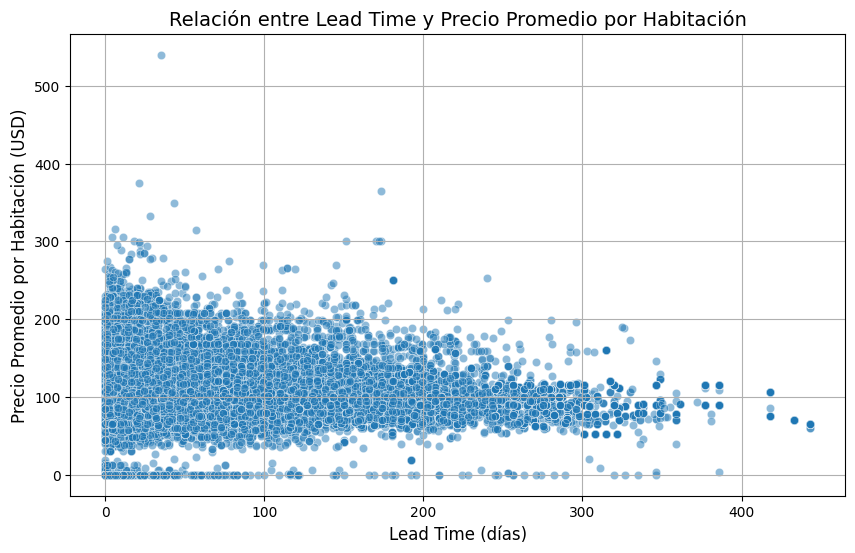

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = df_copia['lead_time'], y = df_copia['avg_price_per_room'], alpha=0.5)
plt.title('Relación entre Lead Time y Precio Promedio por Habitación', fontsize=14)
plt.xlabel('Lead Time (días)', fontsize=12)
plt.ylabel('Precio Promedio por Habitación (USD)', fontsize=12)
plt.grid(True)
plt.show()

En el presente gráfico, la mayoría de los puntos se agrupan hacia la izquierda del gráfico (lead time bajo), lo que indica una gran cantidad de reservas realizadas con poca anticipación. Además, para cualquier valor de lead time, hay una amplia dispersión de precios, lo que sugiere que el lead time no es el único factor que afecta al precio.

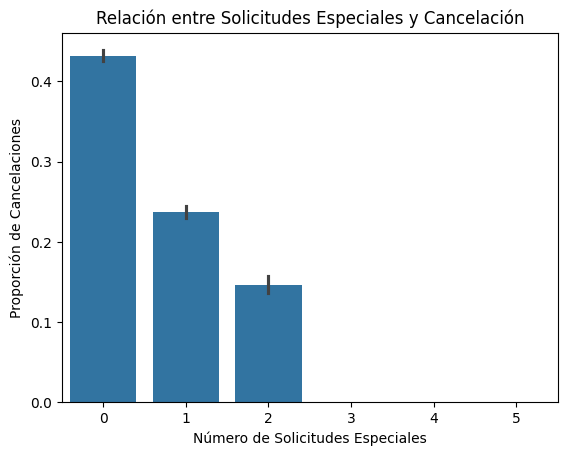

In [14]:
sns.barplot(data=df_copia, x='no_of_special_requests', y=df_copia['booking_status'] == 'Canceled')
plt.title('Relación entre Solicitudes Especiales y Cancelación')
plt.xlabel('Número de Solicitudes Especiales')
plt.ylabel('Proporción de Cancelaciones')
plt.show()

A partir del gráfico se observa una tendencia descendente, a mayor número de solicitudes especiales, menor es la proporción de cancelaciones. Cuando no hay solicitudes especiales (0), la proporción de cancelaciones es más alta (alrededor del 44%). Con 1 o más solicitudes especiales, la proporción baja significativamente. Esto podría sugerir que los clientes que hacen solicitudes especiales están más comprometidos con su reserva y por eso cancelan con menor frecuencia.

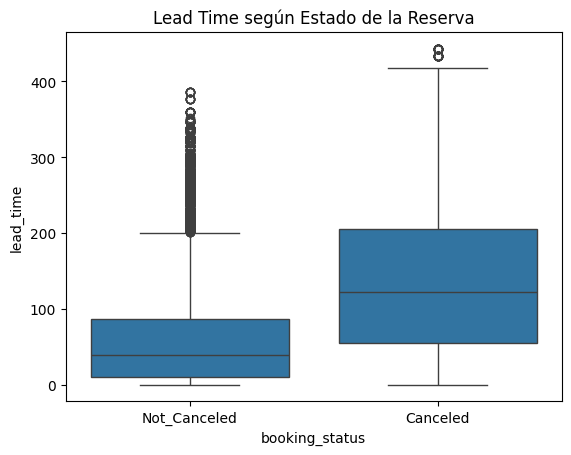

In [15]:
sns.boxplot(x='booking_status', y='lead_time', data=df_copia)
plt.title('Lead Time según Estado de la Reserva')
plt.show()

- Se observa que las reservas canceladas tienden a tener un lead time más alto. Es decir, fueron hechas con mayor anticipación. La mediana es significativamente mayor que la de las reservas no canceladas.
- Las reservas canceladas tienen mayor dispersión y también valores extremos con tiempos muy largos.
- Las reservas no canceladas tienen lead times más cortos y están más concentrados en valores bajos. Esto puede deberse a que las reservas hechas con poca antelación son más seguras y menos propensas a cambios de planes.


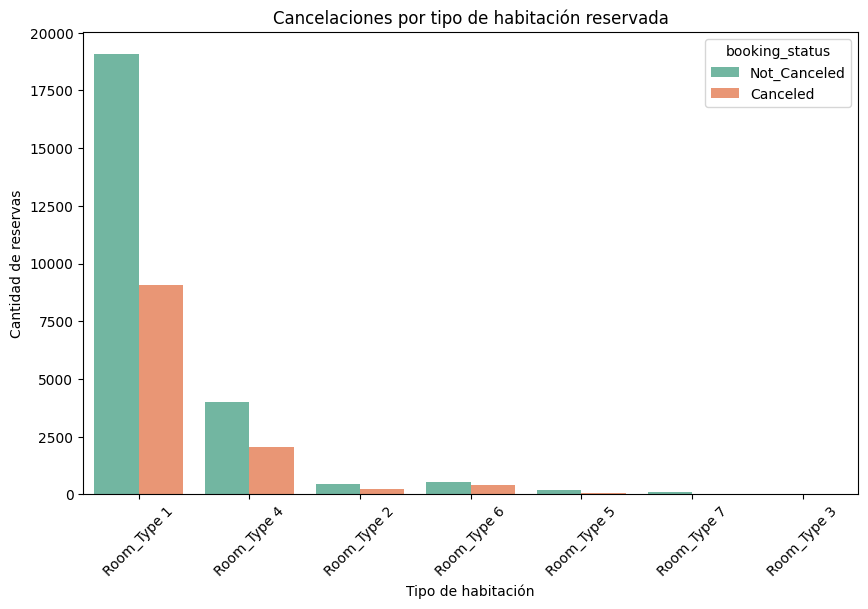

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status', palette='Set2')
plt.title('Cancelaciones por tipo de habitación reservada')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=45)
plt.show()

La cantidad de reservas es mayor en las habitaciones de tipo 1 y tanto las cancelaciones como las reservas son menores en las habitaciones de tipo 5, 7 y 3. En proporción no se observa en que tipo de habitación la cancelación es más frecuente.

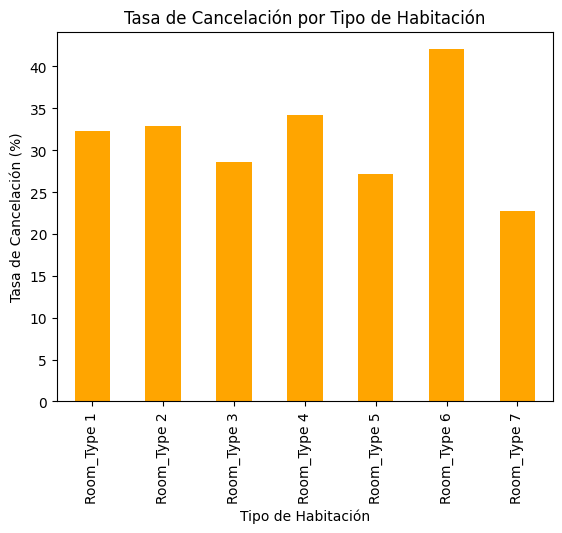

In [17]:
# Contar las reservas canceladas por tipo de habitación
cancelados_por_tipo = df_copia[df_copia['booking_status'] == 'Canceled'].groupby('room_type_reserved').size()

# Contar el total de reservas por tipo de habitación
total_por_tipo = df_copia.groupby('room_type_reserved').size()

# Calcular la tasa de cancelación por tipo de habitación
tasa_cancelacion = (cancelados_por_tipo / total_por_tipo) * 100

# Crear un gráfico de barras para visualizar la tasa de cancelación
tasa_cancelacion.plot(kind='bar', color='orange')
plt.title('Tasa de Cancelación por Tipo de Habitación')
plt.ylabel('Tasa de Cancelación (%)')
plt.xlabel('Tipo de Habitación')
plt.show()

El tipo de habitación 6 muestra una tasa de cancelación superior al 40% podría indicar que hay factores específicos relacionados con esta habitación que están llevando a los huéspedes a cancelarla más a menudo. Algunas posibles razones podrían ser precio o la ubicación de la habitación no es tan atractiva. La habitación 7, por otro lado, tiene una tasa de cancelación de aprox. el 20% y es la más baja.

In [18]:
# Calcular la tasa de cancelación por tipo de habitación
cancelados_por_tipo = df_copia[df_copia['booking_status'] == 'Canceled'].groupby('room_type_reserved').size()
total_por_tipo = df_copia.groupby('room_type_reserved').size()
tasa_cancelacion = (cancelados_por_tipo / total_por_tipo)

# Mapear esa tasa al dataframe original
df_copia['room_type_cancel_rate'] = df_copia['room_type_reserved'].map(tasa_cancelacion)

Se creó una nueva variable que representa la tasa de cancelación por tipo de habitación. Esta variable busca capturar el comportamiento histórico de los clientes en función del tipo de habitación que reservan. De esta manera, el modelo puede aprender no solo a partir de la categoría, sino del contexto que esa categoría representa en términos de cancelaciones.

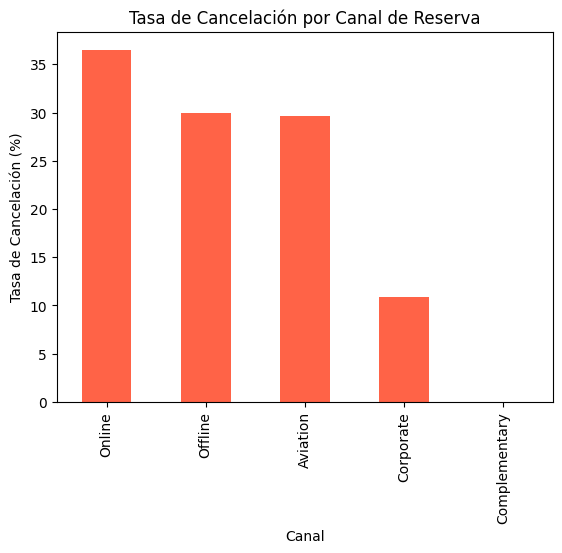

In [19]:
tasa_cancelacion_canal = (
    df_copia[df_copia['booking_status'] == 'Canceled']
    .groupby('market_segment_type').size() /
    df_copia.groupby('market_segment_type').size()
) * 100

tasa_cancelacion_canal.sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title('Tasa de Cancelación por Canal de Reserva')
plt.ylabel('Tasa de Cancelación (%)')
plt.xlabel('Canal')
plt.show()


El gráfico de barras muestra que el canal Online tiene la tasa de cancelaciones más alta, por encima del 35%. Esto podría indicar que las reservas hechas en líneas son más propensas a ser canceladas, quizás por mayor facilidad de acceso o flexibilidad.

In [20]:
# Convertir la serie a un dataframe para combinarla con el dataset original
tasa_cancelacion_canal = tasa_cancelacion_canal.reset_index()
tasa_cancelacion_canal.columns = ['market_segment_type', 'tasa_cancelacion_canal']

# Unir la tasa de cancelación al dataframe original
df_copia = df_copia.merge(tasa_cancelacion_canal, on='market_segment_type', how='left')

Se agrega la tasa de cancelación por canal al dataframe para proporcionar información adicional sobre el comportamiento de los clientes según el canal de reserva. Se observa cómo el canal influye en la probabilidad de cancelación.

In [21]:
# Ver si hay NaN
print("Valores nulos antes:", df_copia["tasa_cancelacion_canal"].isna().sum())

# Imputar con 0 donde no hay cancelaciones registradas
df_copia["tasa_cancelacion_canal"] = df_copia["tasa_cancelacion_canal"].fillna(0)

# Confirmar que ya no hay NaN
print("Valores nulos después:", df_copia["tasa_cancelacion_canal"].isna().sum())

Valores nulos antes: 391
Valores nulos después: 0


In [22]:
# Crear una nueva columna con el total de personas por reserva
df_copia['total_personas'] = df_copia['no_of_adults'] + df_copia['no_of_children']

Se crea la variable total_personas para capturar el tamaño del grupo de la reserva, lo cual puede influir en la probabilidad de cancelación.

In [23]:
# Crear una nueva columna con el total de noches por reserva
df_copia['total_noches'] = df_copia['no_of_weekend_nights'] + df_copia['no_of_week_nights']

Se agrega la variable total de noches de estadía para capturar el compromiso del huésped con la reserva, ya que estadías más largas podrían asociarse a menor probabilidad de cancelación.

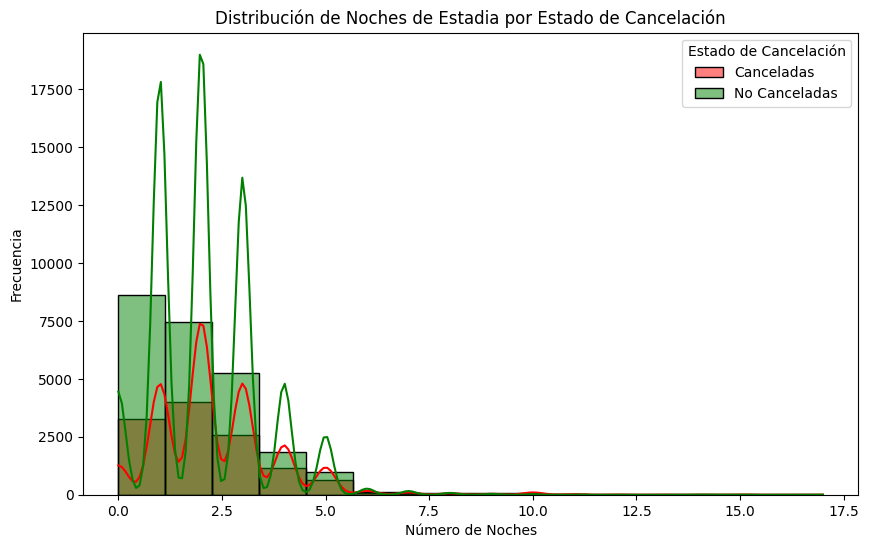

In [24]:
plt.figure(figsize=(10, 6))

sns.histplot(df_copia[df_copia['booking_status'] == 'Canceled']['no_of_week_nights'],
             bins=15, kde=True, color='red', label='Canceladas', alpha=0.5)

sns.histplot(df_copia[df_copia['booking_status'] != 'Canceled']['no_of_week_nights'],
             bins=15, kde=True, color='green', label='No Canceladas', alpha=0.5)

plt.title('Distribución de Noches de Estadia por Estado de Cancelación')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')
plt.legend(title='Estado de Cancelación')
plt.show()

Se observa que las reservas no canceladas son significativamente más frecuentes que las canceladas en todos los rangos de noches. Las reservas canceladas siguen un patrón similar pero en menos volumen. No se observa un aumento de cancelaciones en estancias largas, lo cual puede implicar que la duración de la estadía no es un factor determinante en la decisión de cancelar.

In [25]:
df_copia.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type_cancel_rate,tasa_cancelacion_canal,total_personas,total_noches
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,0.322503,29.948708,2,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,0.322503,36.508142,2,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,0.322503,36.508142,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,0.322503,36.508142,2,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,0.322503,36.508142,2,2


#### PREPROCESAMIENTO DE DATOS

In [43]:
# Copiar el DataFrame original para trabajar sobre él
df_modelo = df_copia.copy()

In [44]:
df_modelo.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [45]:
X = df_modelo.drop('booking_status', axis=1).copy()
y = df_modelo['booking_status'].copy()

In [46]:
X.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,room_type_cancel_rate,tasa_cancelacion_canal,total_personas,total_noches
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,0.322503,29.948708,2,3
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,0.322503,36.508142,2,5
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,Online,0,0,0,60.00,0,0.322503,36.508142,1,3
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,Online,0,0,0,100.00,0,0.322503,36.508142,2,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,Online,0,0,0,94.50,0,0.322503,36.508142,2,2


In [47]:
y.head()

,booking_status
0,Not_Canceled
1,Not_Canceled
2,Canceled
3,Canceled
4,Canceled


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
X_train = X_train.drop('Booking_ID', axis=1)
X_test = X_test.drop('Booking_ID', axis=1)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
# Lista de columnas categóricas a transformar
columnas_cat = ["room_type_reserved", "type_of_meal_plan", "market_segment_type"]

In [53]:
# Crear y ajustar el encoder sobre X_train
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[columnas_cat])

In [54]:
# Transformar X_train y crear DataFrame
encoded_train = ohe.transform(X_train[columnas_cat])
encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(), index=X_train.index)
encoded_train_df

,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
28493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24513,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29959,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6705,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33477,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [55]:
# Concatenar y eliminar columnas originales
X_train = pd.concat([X_train.drop(columns=columnas_cat), encoded_train_df], axis=1)

In [56]:
# Repetir para X_test
encoded_test = ohe.transform(X_test[columnas_cat])
encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test = pd.concat([X_test.drop(columns=columnas_cat), encoded_test_df], axis=1)

In [57]:
# Mapear la variable objetivo si es categórica (ajustar según tus valores reales)
reglas = {"Canceled": 1, "Not_Canceled": 0}
y_train = y_train.map(reglas)
y_test = y_test.map(reglas)

In [58]:
y_train

,booking_status
28493,1
24513,0
31678,0
32750,0
29959,0
...,...
19684,0
6705,1
24603,0
33477,0


In [59]:
y_test

,booking_status
34902,1
7800,1
21836,0
31414,0
4146,0
...,...
7204,0
16472,0
28288,0
24446,0


#### ENTRENAMIENTO DEL MODELO: ÁRBOL DE DECISIÓN

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
X_train.select_dtypes(include='object').columns


Index([], dtype='object')

In [69]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,random_state=42).fit(X_train, y_train)

Se limita a máximo 5 niveles y hojas con al menos 10 muestras, esto tiene como objetivo evitar el sobreajuste y hacer que el modelo generalice mejor.

In [70]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [71]:
# Array con resultados
train_pred

array([1, 0, 0, ..., 1, 0, 1])

#### EVALUACIÓN DEL MODELO

In [72]:
from sklearn.metrics import classification_report

In [73]:
# Performance del modelo
print("training")
print(classification_report(y_train, train_pred))
print("------")
print("testing")
print(classification_report(y_test, test_pred))

training
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     17073
           1       0.75      0.71      0.73      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.80      0.80     25392
weighted avg       0.83      0.83      0.83     25392

------
testing
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7317
           1       0.76      0.72      0.74      3566

    accuracy                           0.83     10883
   macro avg       0.81      0.80      0.81     10883
weighted avg       0.83      0.83      0.83     10883

